## Import

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import random

from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.classify import SklearnClassifier
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

import networkx as nx

## Task 1

Task 1 has been done on an external software Gephi, and therefore I wrote the report on a word document. The report has been merged to the beginning of this pdf.

## Task 2

In [2]:
# Import data set
number_nodes = 62

df = pd.read_csv('t2_dolphins.txt', sep="\s+", header=None, names=["n1", "n2"]) #
print("data shape: ", df.shape)
df.head()

data shape:  (159, 2)


,n1,n2
0,11,1
1,15,1
2,16,1
3,41,1
4,43,1


### Task 2 a)

<div class="alert alert-success">
<b>Questions</b> 

* In this task only undirected graphs are considered, since the professors confirmed that only undirected graphs need to be analyzed.
* For undirected graphs, the notion of density of the subgraph is the average degree of the subgraph.
* First thought:
    * Search node with highest degree
    * of all neighbors search node with highest degree and add it to the subgraphs
    * out of all current nodes in the subgraph find neighbor with highest degree and add it to the subgraph
* However, the paper 'Greedy Approximation Algortihms for Finding Dense Components in a Graph' by Moses Charikar analyzes another algortihm that is more efficent and promises better results:
    * Given a number a set of vertices that build a graph, remove in every step the vertice with lowest degree
    * Calculate in each step the density and store for each step the density and vertices of used subgraph
    * Do that till all nodes are deleted
    * return subgraph with highest density

</div>

### Task 2 b)

In [41]:
def calculate_density(subgraph):
    """ Calculate density of subgraph according to formula given in task description
    """
    number_edges = subgraph.shape[0]
    number_nodes = len(np.unique(subgraph))
    
    density = number_edges / number_nodes
    
    return density

def greedy_dense_subgraph(graph):
    """ Greedy algorithm to find a subgraph with good density
    """
    number_nodes = len(np.unique(graph))
    current_subgraph = graph
    subgraph_density_history = []  # keep track of subraphs and their density score
    density_score_history = []
    number_edges_history = []
    
    while (number_nodes > 0):
        
        # calculate density
        density_score = calculate_density(current_subgraph)
        subgraph_density_history.append((density_score, current_subgraph))
        density_score_history.append(density_score)
        number_edges_history.append(current_subgraph.shape[0])
        
        # delete node with lowest degree
        nodes, counts = np.unique(current_subgraph, return_counts=True)
        idx_lowest_degree = np.argmin(counts)
        node_lowest_degree = nodes[idx_lowest_degree]
        
        new_subgraph = []
        for edge in current_subgraph:  # loop through all edges
            if (node_lowest_degree not in edge):
                new_subgraph.append(edge)
            
        
        current_subgraph = np.array(new_subgraph)
        number_nodes = len(np.unique(current_subgraph))
        
    # identify subgraph with highest density
    densities = [density for (density, subgraph) in subgraph_density_history]
    #print("densities", densities)
    max_ids = np.argmax(densities)
    (max_density_score, subgraph) = subgraph_density_history[max_ids]
    

    return max_density_score, subgraph, density_score_history, number_edges_history


In [42]:
graph = df.to_numpy()

density_score, subgraph, density_score_history, number_edges_history = greedy_dense_subgraph(graph)
print("Highest density score: ", density_score)
print("Number of edges: ", subgraph.shape[0])
print("Number of nodes: ", len(np.unique(subgraph)))

Highest density score:  3.0277777777777777
Number of edges:  109
Number of nodes:  36


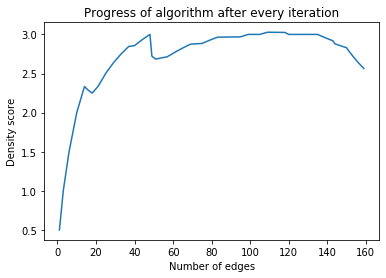

In [48]:
plt.plot(number_edges_history, density_score_history)
plt.title("Progress of algorithm after every iteration")
plt.xlabel("Number of edges")
plt.ylabel("Density score")
plt.show()
#plt.plot(range(len(density_score)),density_score)

<div class="alert alert-success">
<b>Questions</b> 

* The given dolphins dataset is undirected and unweighted, and the implemented algorithm is adjusted to that

</div>

## Task 3

Since we only needed to do 4 out of 5 tasks, I decided to leave out Task 3.

## Task 4

In [74]:
# load datasets

df_train = pd.read_csv("t4_jester-800-10.csv")
df_test = pd.read_csv("t4_test-800-10.csv")

df_train.head()

,user_id,joke_5,joke_7,joke_8,joke_13,joke_15,joke_16,joke_17,joke_18,joke_19,joke_20,num_positives
0,5013,0,1,0,0,1,0,0,1,1,1,5
1,10016,0,0,0,1,0,1,1,1,0,1,5
2,21844,1,1,1,1,1,1,1,1,1,1,10
3,3403,1,0,0,1,0,1,1,0,1,1,6
4,23240,0,1,0,1,1,1,1,1,0,1,7


In [76]:
user_ids = df_train["user_id"].values
joke_names = df_train.columns.values

In [80]:
# Create bi-partite graph
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(user_ids, bipartite=0)
B.add_nodes_from(joke_names, bipartite=1)
# Add edges only between nodes of opposite node sets

set_of_edges = []

for user in user_ids:
    row = df_train.loc[df_train['user_id'] == user]
    for joke in joke_names:
        like = int(row[joke])
        if (like == 1):  # add edge to the graph
            set_of_edges.append((user, joke))
        
B.add_edges_from(set_of_edges)

In [ ]:
# calculate simrank, everyone with everyone
#sim = nx.simrank_similarity(B)

In [ ]:
users_sorted = sorted(user_ids)

lol = [[sim[u][v] for v in users_sorted] for u in users_sorted]
sim_array = np.array(lol)
sim_array

Explanation:

Unfortunately, I couldn't finish this task because I underestimated the computation time of the simrank algorithm. Only a few steps are missing. So when the calculating of the SimRank finishes, we get a dictionary that contains for each node the similarity score to every other node. Therefore there are dictionaries within a dictionary. We get an n x n matrix. Then we search for the test nodes. For each test node get the highest value in each row which is not the same node. So we can set the diagonal to zero to make sure this doesn't happen. With np.argmax() we the index with the node of the highest similarity score. Then we check which jokes the most similar user liked that haven't been liked so far from the test user and recommend these jokes to the test user.



<div class="alert alert-success">
<b>Questions</b> 

* We use collaborative filtering, because we want to give recommendations based on similar users they have watched, what they liked and therefore what could be recommended to the other person.
* Two users are similar if they watched and liked similar movies. Hence, it is very likely that a movie liked by User 1 but not yet watched by User 2, User 2 will also very likely will enjoy.
* Therefore, the assumption we use: The user probably likes what other similar users have liked.

</div>

## Task 5

### Task 5 a)

#### Without preprocessing

Data collection

In [5]:
# get movie reviews data
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
#print(documents[:1])
#documents = np.array(documents)

Data preprocessing
* Remove stopwords
* perform stemming

In [6]:
# calculate frequency of words
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]  # first 2000 most frequent words; ordered by frequency
print(word_features[:5])  # first five most frequent words


def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Feature extraction and training:
featuresets = [(document_features(d), c) for (d,c) in documents] # c: positive or negative, d: words
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
#classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

# Use of classifier:

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(5)

print()
print()

['plot', ':', 'two', 'teen', 'couples']
0.79
Most Informative Features
       contains(stellan) = True              pos : neg    =      8.2 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.8 : 1.0
    contains(schumacher) = True              neg : pos    =      7.5 : 1.0
     contains(atrocious) = True              neg : pos    =      6.7 : 1.0
        contains(turkey) = True              neg : pos    =      6.7 : 1.0




#### With preprocessing

In [7]:
# get movie reviews data
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
#print(documents[:1])
#documents = np.array(documents)

Data preprocessing
* Remove stopwords
* perform stemming

In [8]:
# stemming
porter = PorterStemmer()
stemmed_documents = []
for (d,c) in documents:
    stemmed_documents.append(([porter.stem(j) for j in d], c))
print('After stemming:')


After stemming:


In [9]:
# stop words removal and punctation removal
stop_words = set(stopwords.words('english'))
# We include the punctation in the stop words set.
punctation = set("!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~\"\'")
stop_words.update(punctation)
stop_words.add("...")

#print('Stop words that will get removed:')
#print(stop_words)
#print()

filtered_documents = []    
for (d,c) in stemmed_documents: 
    filtered_documents.append(([word for word in d if word not in stop_words], c))

In [10]:
# calculate frequency of words
all_words_documents = []
for (d,c) in filtered_documents:
    for word in d:
        all_words_documents.append(word)

all_words = nltk.FreqDist(w.lower() for w in all_words_documents)
word_features = list(all_words)[:2000]  # first 2000 most frequent words; ordered by frequency
print(word_features[:5])  # first five most frequent words


def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Feature extraction and training:
featuresets = [(document_features(d), c) for (d,c) in filtered_documents] # c: positive or negative, d: words
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
#classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

# Use of classifier:

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(5)

['robin', 'william', 'comed', 'genu', 'one']
0.8
Most Informative Features
      contains(outstand) = True              pos : neg    =     13.4 : 1.0
          contains(plod) = True              neg : pos    =     13.1 : 1.0
      contains(furnitur) = True              neg : pos    =      7.0 : 1.0
       contains(sputter) = True              neg : pos    =      7.0 : 1.0
  contains(breakthrough) = True              pos : neg    =      7.0 : 1.0


<div class="alert alert-success">
<b>Questions</b> 

Results without preprocessing:
* Naive Bayes Classifier: 0.77
* Support Vector Classifier: 0.77

    
Results with preprocessing (stemming and removal of stopwords):
* Naive Bayes Classifier: 0.78
* Support Vector Classifier: 0.8
    
Results and Interpretation:
* The results get slightly better
* Only important features were put into considertion
* Deletion of stopwards and punctuation
</div>

### Task 5 b)

#### Replace words by hypernym

In [11]:
# get movie reviews data
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
#print(documents[:1])
#documents = np.array(documents)

Data preprocessing
* Remove stopwords

In [12]:
# stop words removal and punctation removal
stop_words = set(stopwords.words('english'))
# We include the punctation in the stop words set.
punctation = set("!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~\"\'")
stop_words.update(punctation)
stop_words.add("...")

filtered_documents = []    
for (d,c) in documents: 
    filtered_documents.append(([word for word in d if word not in stop_words], c))

In [13]:
# Replace words with hypernym
hypernym_documents = []
for (d,c) in filtered_documents:
    hypernym_array = []
    for word in d:
        
        synsets = wn.synsets(word)  # get all sysnsets
        if (synsets == []):
            name = word
        else:
            first_synset = synsets[0]  # choose first synset
            hypernyms = first_synset.hypernyms()  # get all hypernyms of first synset
            if (hypernyms == []):
                name = word
            else:
                hypernym = hypernyms[0]  # choose first hyernym
                lemmas = hypernym.lemmas()  # get all lemmas
                lemma = lemmas[0]  # choose first lemma
                
                name = lemma.name()  # get name of lemma
        
        
        hypernym_array.append(name)
        
    hypernym_documents.append( (hypernym_array, c) )

Feature engineering

In [14]:
# calculate frequency of words
all_words_documents = []
for (d,c) in hypernym_documents:
    for word in d:
        all_words_documents.append(word)

all_words = nltk.FreqDist(w.lower() for w in all_words_documents)
word_features = list(all_words)[:2000]  # first 2000 most frequent words; ordered by frequency
print(word_features[:5])  # first five most frequent words


def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Feature extraction and training:
featuresets = [(document_features(d), c) for (d,c) in hypernym_documents] # c: positive or negative, d: words
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
#classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

# Use of classifier:

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(5)

['steve', 'martin', 'act', 'increase', 'leisure']
0.76
Most Informative Features
     contains(ludicrous) = True              neg : pos    =     15.2 : 1.0
   contains(outstanding) = True              pos : neg    =     11.1 : 1.0
    contains(incoherent) = True              neg : pos    =      9.1 : 1.0
        contains(feeble) = True              neg : pos    =      7.7 : 1.0
      contains(believer) = True              pos : neg    =      6.9 : 1.0


<div class="alert alert-success">
<b>Questions</b> 

Results:
* Naive Bayes Classifier: 0.81
* Support Vector Classifier: 0.8
    
Results and Interpretation:
* For task b) no stemming, because wordnet synset and hypernyms work worse on stemmed words. For instance, wordnet works well on wn.synsets('happiest') or wn.synsets('happier'), but not on stemmed word of happy which is wn.synsets('happi').
* The results improved again slightly in the case of Naive Bayes Classifier to 0.81
* makes absolutely sense since we replace words with similar meaning to the same word





</div>

#### Add hypernyms of words

In [15]:
# get movie reviews data
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
#print(documents[:1])
#documents = np.array(documents)

Data preprocessing
* Remove stopwords

In [16]:
# stop words removal and punctation removal
stop_words = set(stopwords.words('english'))
# We include the punctation in the stop words set.
punctation = set("!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~\"\'")
stop_words.update(punctation)
stop_words.add("...")

filtered_documents = []    
for (d,c) in documents: 
    filtered_documents.append(([word for word in d if word not in stop_words], c))

In [17]:
# Replace words with hypernym
hypernym_documents = []
for (d,c) in filtered_documents:
    hypernym_array = []
    for word in d:
        hypernym_array.append(word)
        
        synsets = wn.synsets(word)  # get all sysnsets
        if (synsets == []):
            continue
        else:
            first_synset = synsets[0]  # choose first synset
            hypernyms = first_synset.hypernyms()  # get all hypernyms of first synset
            if (hypernyms == []):
                continue
            else:
                hypernym = hypernyms[0]  # choose first hyernym
                lemmas = hypernym.lemmas()  # get all lemmas
                lemma = lemmas[0]  # choose first lemma
                name = lemma.name()  # get name of lemma
        
                hypernym_array.append(name)
        
    hypernym_documents.append( (hypernym_array, c) )

Feature engineering

In [18]:
# calculate frequency of words
all_words_documents = []
for (d,c) in hypernym_documents:
    for word in d:
        all_words_documents.append(word)

all_words = nltk.FreqDist(w.lower() for w in all_words_documents)
word_features = list(all_words)[:2000]  # first 2000 most frequent words; ordered by frequency
print(word_features[:5])  # first five most frequent words


def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Feature extraction and training:
featuresets = [(document_features(d), c) for (d,c) in hypernym_documents] # c: positive or negative, d: words
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
#classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

# Use of classifier:

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(5)

['tempe', 'mills', 'cinema', 'medium', 'az']
0.72
Most Informative Features
      contains(bothered) = True              neg : pos    =      9.7 : 1.0
     contains(strongest) = True              pos : neg    =      9.0 : 1.0
       contains(winslet) = True              pos : neg    =      7.7 : 1.0
    contains(cronenberg) = True              pos : neg    =      7.0 : 1.0
          contains(gump) = True              pos : neg    =      7.0 : 1.0


<div class="alert alert-success">
<b>Questions</b> 

Results:
* Naive Bayes Classifier: 0.73
* Support Vector Classifier: 0.76
    
Results and Interpretation:
* For task b) no stemming, because wordnet synset and hypernyms work worse on stemmed words. For instance, wordnet works well on wn.synsets('happiest') or wn.synsets('happier'), but not on stemmed word of happy which is wn.synsets('happi').
* The results improved got worse for both classifiers while the scores dropped to 0.73 and 0.76.
* That makes kind of sense, because not all words have hypernyms. So imagine for instance not important words have hypernyms while important words don't have hypernyms. So we add the hypernyms of not important words. Consequently, not important words are more frequent and have more weight. That results in a worse classification score. Therefore, it is better to replace the words by its hypernym.





</div>

-------------------------------